# Lista 4 - Física Computacional I
Aluna: Ylana Karolina Santos Lopes

In [124]:
from numpy import exp, pi, cos, sin, arange, linspace, loadtxt, empty, sqrt, tanh, cosh
from pylab import plot, xlabel, ylabel, imshow, xlim, ylim, gray, show, hsv

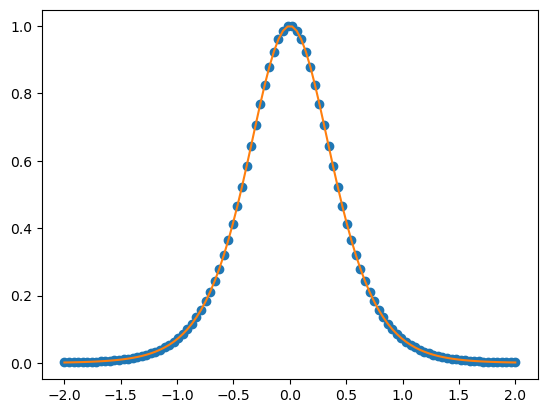

In [83]:
## Problema 1
def df(x, h):
    def f(x):
        return 1 + 0.5*tanh(2*x)
        h = 1e-8
    return (f(x + h)-f(x-h))/(2*h)

a = linspace(-2,2,100)
test = (1/(cosh(2*a))**2)

h = 1e-8

plot(a, df(a, h), 'o')
plot(a, test)


Resolução analítica:

$$ \frac{d}{dx}(1 + \frac{1}{2}tanh(2x)) = $$
$$ \frac{d}{dx}(1) + \frac{d}{dx}(\frac{1}{2}tanh(2x)))= $$
$$ = sech^2(2x)$$

In [85]:
## Problema 2
#a)

def df2(x, h):
    def f(x):
        return 1 + 0.5*tanh(2*x)
    h = 1e-8
    dev = (1/24)*f(x - 1.5*h)
    dev += -(27/24)*f(x-0.5*h) 
    dev += (27/24)*f(x+0.5*h) 
    dev += - (1/24)*f(x + 1.5*h)
    return dev/h

#print(df(a, h))

In [92]:
#b)
def fa(a):
    return (1/(cosh(2*a))**2)

h = [0.01, 0.001, 1.0e-4, 1.0e-5, 1.0e-6, 1.0e-7]

mini = fa(0) - df(0,h[0])
h_m = h[0]
for l in h:
    e1 = fa(0)-df(0,l) 
    if(e1<0):
        e1 = -e1
    if(e1<mini):
        mini = e1
        h_m = l
    
print("O h do mínimo erro:", h_m)

O h do mínimo erro: 1e-06


In [97]:
#c)

mini = fa(0) - df2(0,h[0])
h_m = h[0]
for l in h:
    e2 = fa(0)-df2(0,l) 
    if(e2<0):
        e2 = -e2
    if(e2<mini):
        mini = e2
        h_m = l

    
print("O h do mínimo erro:", h_m)

O h do mínimo erro: 0.01


--> O h é maior no caso com a aproximação de ordem 3, porque existe um menor erro de arredondamento associado a essa ordem.

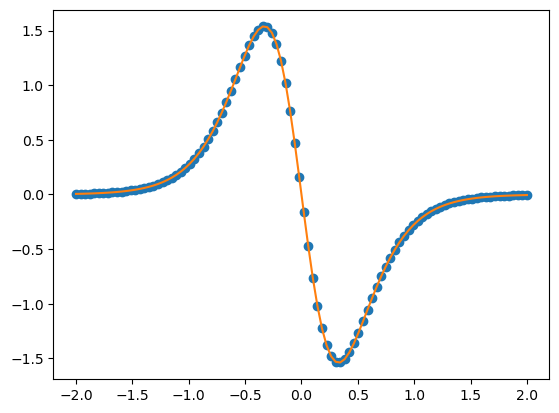

In [115]:
## Problema 3
x = linspace(-2.0,2.0,100)

def f(x):
    return 1 + 0.5*tanh(2*x)

def d2f(x):
    h = 1e-6
    dev = f(x+h) - 2*f(x) + f(x-h) 
    return dev/(h**2)

f2a = -4*(1/cosh(2*x))**2*tanh(2*x)

plot(x, d2f(x), "o")
plot(x,f2a)

Resolução analítica:

$$\frac{d^2}{dx^2}(1 + \frac{1}{2}tanh(2x)) = $$
$$\frac{d}{dx}(\frac{d}{dx}(1) + \frac{d}{dx}(\frac{1}{2}tanh(2x))))=$$
$$\frac{d}{dx}(sech^2(2x))=$$
$$ = -4sech^2(2x) tanh(2x)$$

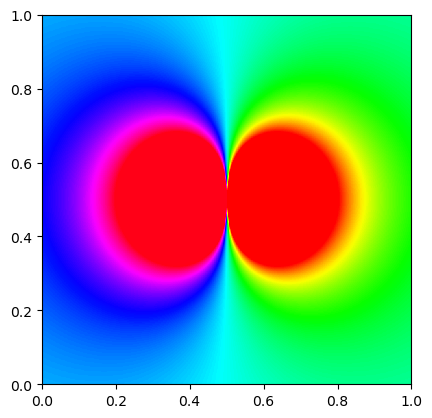

In [134]:
## Problema 4

#a)
def P(r,q):
    k = 8.98e9
    return q*k/r
q1 = 1
q2 = -1
N = 200

x = linspace(-0.5, 0.5, N)  ## Usei as coordenadas q1(-5,0) e q2(5,0) em cm
y = linspace(-0.5, 0.5, N)

Pr = []
for i in range(0,N):
    linha = []
    for j in range(0, N):
        temp1 = ((-0.05-x[j])**2 + (y[i])**2)**0.5
        temp2 = ((0.05-x[j])**2 + (y[i])**2)**0.5
        p1 = (P(temp1,q1))
        p2 = (P(temp2,q2))
        linha.append(p1+p2)
    Pr.append(linha)
    
imshow(Pr, origin='lower', extent = [0,1,0,1],vmax=1e10, vmin = -1e10)   
hsv()

In [135]:
# b)
h = 1e-5
def f(x,y,q):
    k = 8.98e9
    return q*k/((x**2 + y**2)**0.5)

def dx(x,y,q):
    return (f(x+h/2,y,q)-f(x-h/2,y,q))/h

def dy(x,y,q):
    return (f(x, y+h/2,q)-f(x,y-h/2,q))/h

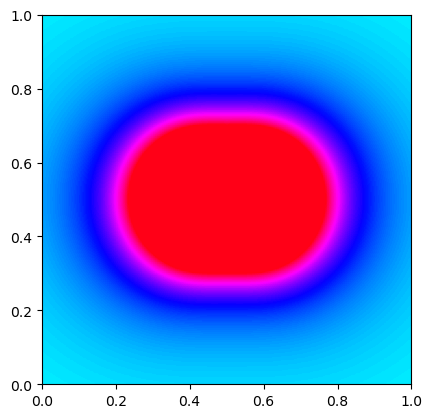

In [138]:
dex = []
dey= []
E = []
Ex = []
Ey = []
for i in range(0,N):
    l = []
    lx = []
    ly = []
    t = []
    t2 = []
    t3 = []
    t4 = []
    for j in range(0,N):
        t.append(dx(-0.05-x[j],y[i],q1))
        t2.append(dy(-0.05-x[j],y[i],q1))
        t3.append(dx(0.05-x[j],y[i],q2))
        t4.append(dy(0.05-x[j],y[i],q2))
        lx.append(dx(-0.05-x[j],y[i],q1)+dx(0.05-x[j],y[i],q2))
        ly.append(dy(-0.05-x[j],y[i],q1)+dy(0.05-x[j],y[i],q2))
        l.append(((dx(-0.05-x[j],y[i],q1)+dx(0.05-x[j],y[i],q2))**2 + (dy(-0.05-x[j],y[i],q1)+dy(0.05-x[j],y[i],q2))**2)**0.5)
    E.append(l)
    Ex.append(lx)
    Ey.append(ly)
    dex.append(t + t3)
    dey.append(t2 + t4)
    
imshow(E, origin='lower', extent = [0,1,0,1], vmax=1e11, vmin = -1e11)
hsv()    


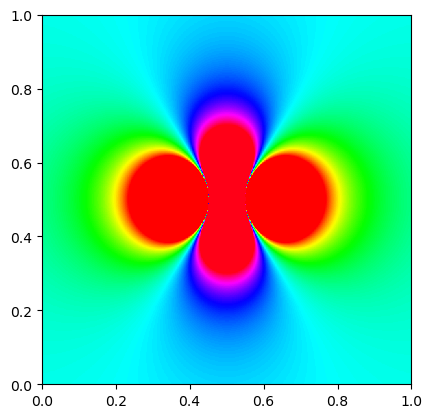

In [139]:
imshow(Ex, origin='lower', extent = [0,1,0,1], vmax=1e11, vmin = -1e11)
hsv()    


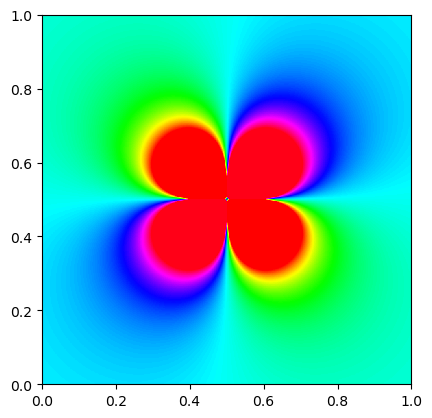

In [140]:
imshow(Ey, origin='lower', extent = [0,1,0,1], vmax=1e11, vmin = -1e11)
hsv()    
